In [163]:
import matplotlib as mpl

In [333]:
from matplotlib.patches import Rectangle

In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
import pymaster as nmt
%matplotlib inline

In [2]:
import astropy

In [3]:
import pysm3
import pysm3.units as u

In [4]:
import os

os.environ["OMP_NUM_THREADS"] = "64" 

In [5]:
import seaborn as sns

sns.set_context("talk")
sns.set_style("ticks")

In [6]:
from mix_tools import *
from projection_tools import *

In [7]:
from utilities import *

# load forse map

In [60]:
QU_forse = hp.read_map('/global/cscratch1/sd/jianyao/ForSE/forse_QU_thermaldust_12amin_2048_v0.fits', field = None)

In [61]:
QU_forse <<= u.uK_CMB
QU_forse = QU_forse.to("uK_RJ", equivalencies=u.cmb_equivalencies(353 * u.GHz)) # transform to uK_RJ

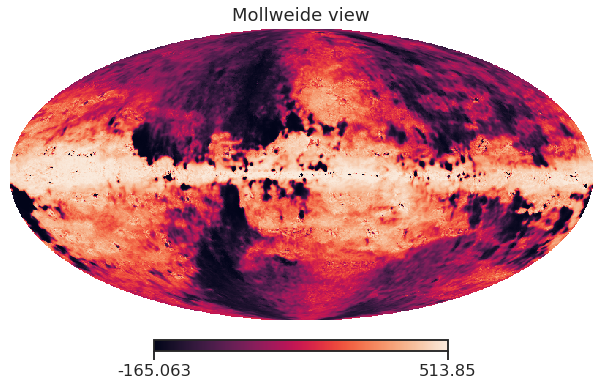

In [64]:
hp.mollview(QU_forse[0], norm = 'hist')

In [65]:
lmax = 2048;output_nside = 2048;
spectra_components = ["TT", "EE", "BB"]
ell_fit_high = {"TT":400, "EE":110, "BB":110}

IQU_forse = np.row_stack((np.zeros_like(QU_forse[0]), QU_forse))

In [66]:
ss_forse = get_small_scales(IQU_forse, lmax, spectra_components, ell_fit_high, output_nside)

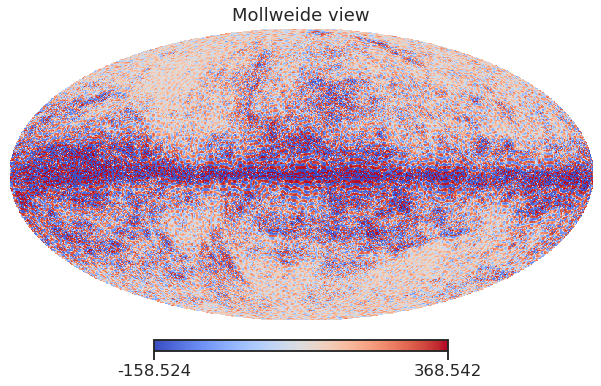

In [67]:
hp.mollview(ss_forse[1], norm = 'hist', cmap = 'coolwarm')

In [71]:
savedir

'/global/cscratch1/sd/jianyao/Dust/MFs/no_rescale_12amin/'

In [74]:
IQU_ss_only = hp.read_map(savedir + "no_rescale_12amindust_IQU_only_small_scales_000.fits", field = None)
IQU = hp.read_map(savedir + f"no_rescale_12amindust_IQU_with_small_scales.fits", field = None) # IQU with small scales added
iqu_ss_only = hp.read_map(savedir + "no_rescale_12amindust_IQU_from_iqu_only_small_scales_000.fits", field = None)
IQU_iqu = hp.read_map(savedir + "no_rescale_12amindust_IQU_from_iqu_with_small_scales.fits", field = None) # iqu with small added

In [ ]:
centers = [[0, 45], [45, 45], [0, -45], [315, 45], [311, -56], [45, -45]]
for center in centers:
    zoom_plot_three(IQU, IQU_ss_only, IQU_iqu, iqu_ss_only, IQU_forse, ss_forse, center = center,  unify = True)

In [80]:
planck_mask_filename = "/global/cscratch1/sd/jianyao/Dust/" + "HFI_Mask_GalPlane-apo2_2048_R2.00.fits"
planck_mask_80 = hp.read_map(planck_mask_filename, ["GAL080"])
planck_mask_90 = hp.read_map(planck_mask_filename, ["GAL090"])

In [81]:
ell_hp, cl_norm_hp, cl2_hp = run_anafast(IQU, lmax = lmax)

ell, cl_norm, cl2_na = run_namaster(IQU, mask=planck_mask_80, lmax=lmax, nlbins = 10)
ell, cl_norm, cl2_na_90 = run_namaster(IQU, mask=planck_mask_90, lmax=lmax, nlbins = 10)

In [82]:
ell_hp, cl_norm_hp, cl_f_hp = run_anafast(IQU_forse, lmax = lmax)

ell, cl_norm, cl_f_na = run_namaster(IQU_forse, mask=planck_mask_80, lmax=lmax, nlbins = 10)
ell, cl_norm, cl_f_na_90 = run_namaster(IQU_forse, mask=planck_mask_90, lmax=lmax, nlbins = 10)

In [84]:
lmax

2048

In [85]:
ell_hp, cl_norm_hp, cl_IQU_iqu_hp = run_anafast(IQU_iqu, lmax = lmax)
ell, cl_norm, cl_IQU_iqu_na = run_namaster(IQU_iqu, mask=planck_mask_80, lmax=lmax, nlbins = 10)
ell, cl_norm, cl_IQU_iqu_na_90 = run_namaster(IQU_iqu, mask=planck_mask_90, lmax=lmax, nlbins = 10)

Text(0.5, 0.98, 'Green: IQU; Red: IQU_iqu; Blue: IQU_Forse; 100%, 90%, 80%')

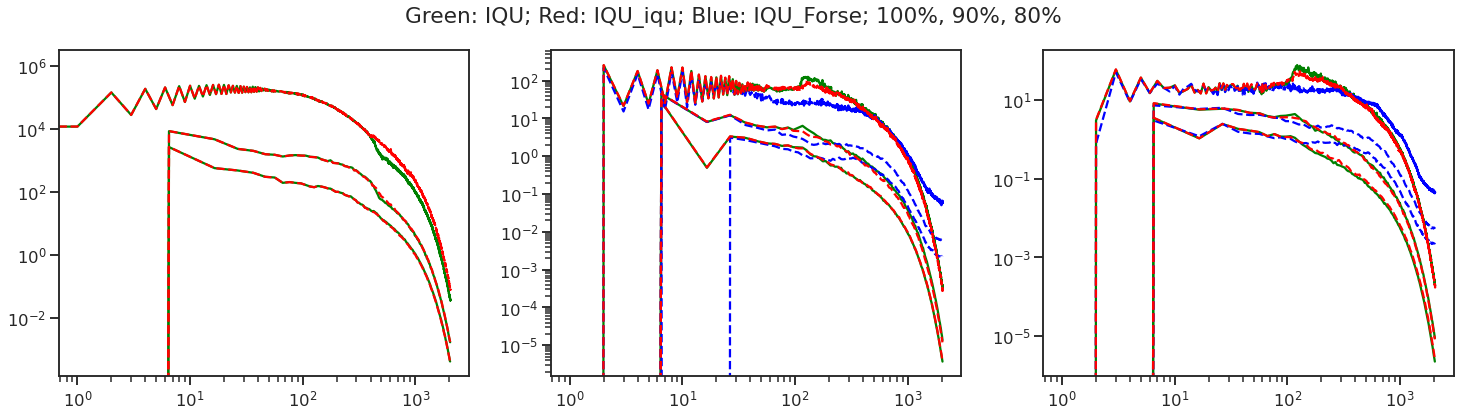

In [98]:
modes = ['TT', 'EE', 'BB']
fig, axes = plt.subplots(1,3, figsize=(25,6))
for i in range(3):
    ax = axes[i]
    ax.loglog(ell_hp,  cl_norm_hp*cl2_hp[modes[i]], 'g-', label = 'full-sky')
    ax.loglog(ell,  cl_norm*cl2_na_90[modes[i]], 'g-',label = '90%')
    ax.loglog(ell,  cl_norm*cl2_na[modes[i]], 'g-',label = '80%')
    # ax.loglog(ell,  cl_norm*cl2_na_50[modes[i]], 'g-',label = '50%')
    
    ax.loglog(ell_hp,  cl_norm_hp*cl_f_hp[modes[i]], 'b--', label = 'full-sky')
    ax.loglog(ell,  cl_norm*cl_f_na_90[modes[i]], 'b--',label = '90%')
    ax.loglog(ell,  cl_norm*cl_f_na[modes[i]], 'b--',label = '80%')
    # ax.loglog(ell,  cl_norm*cl2_na_50[modes[i]], 'g-',label = '50%')
    
    ax.loglog(ell_hp,  cl_norm_hp*cl_IQU_iqu_hp[modes[i]], 'r--', label = 'full-sky')
    ax.loglog(ell,  cl_norm*cl_IQU_iqu_na_90[modes[i]], 'r--', label = '90%')
    ax.loglog(ell,  cl_norm*cl_IQU_iqu_na[modes[i]], 'r--', label = '80%')
    # ax.loglog(ell,  cl_norm*cl_IQU_iqu_na_50[modes[i]], 'r--', label = '50%')
fig.suptitle('Green: IQU; Red: IQU_iqu; Blue: IQU_Forse; 100%, 90%, 80%')

# load results

In [12]:
header0 = set_header(0, 45, size_patch=3.75/60, Npix=320)
header1 = set_header(45, 45, size_patch=3.75/60, Npix=320)
header2 = set_header(0, -45, size_patch=3.75/60, Npix=320)
header3 = set_header(315, 45, size_patch=3.75/60, Npix=320)
header4 = set_header(311, -56.5, size_patch=3.75/60, Npix=250)
header5 = set_header(45, -45, size_patch=3.75/60, Npix=320)

headers = [header0, header1, header2, header3, header4, header5]

In [3]:
nside_pre = 64

In [4]:
bicep2 = np.loadtxt("B2_3yr_373sqdeg_field_20140509.txt", delimiter=',')
bicep2_pix = hp.ang2pix(nside_pre, bicep2[:, 2], bicep2[:, 3], lonlat = True)

In [6]:
bicep2_pix[0]

43412

In [13]:
theta, phi = hp.pix2ang(64, 43412)

In [14]:
ra = np.rad2deg(phi)
dec = np.rad2deg(0.5 * np.pi - theta)

In [15]:
ra, dec

(334.16666666666663, -49.7023903266307)

In [16]:
hp.pix2ang(64, 43412, lonlat=True)

(334.16666666666663, -49.702390326630706)

In [21]:
patch_Q = np.random.rand(320, 320)
mask_tot = np.zeros(12*nside_pre**2)
for i in range(len(headers)):
    patch_healpix = f2h(patch_Q, headers[i], nside_pre)
    mask_tot += patch_healpix[1]

0.0 180.0 -180.0 180.0


Text(-0.40295364697926345, 0.5920417498322602, 'FFF')

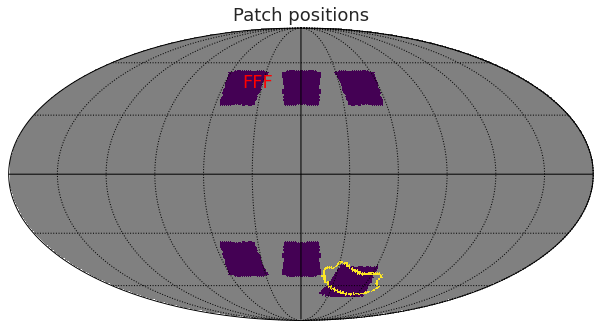

In [48]:
mask_tot[bicep2_pix] = 10
mask_tot[mask_tot==0] = hp.UNSEEN
hp.mollview(mask_tot, norm = 'hist', cbar = False, title = 'Patch positions', cmap = 'viridis')
hp.graticule()


# hp.projtext(316.08, -56.29, 'TTT', lonlat=True)
# hp.projtext(-45, -45, 'FFF', lonlat=True)

hp.projtext(45, 45, 'FFF', lonlat=True, color = 'red')

Text(0.40295364697926345, 0.5920417498322602, 'FFF')

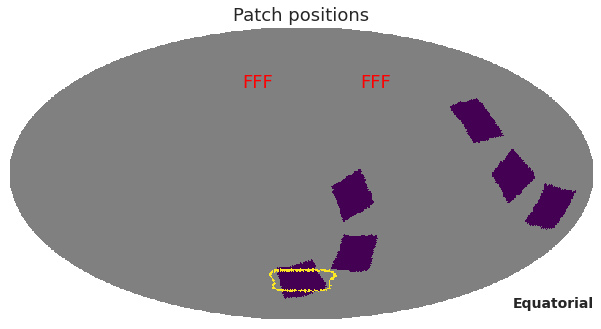

In [55]:
hp.mollview(mask_tot, norm = 'hist', cbar = False, title = 'Patch positions', cmap = 'viridis', coord = ['G', 'C'])
hp.projtext(45, 45, 'FFF', lonlat=True, color = 'red')
hp.projtext(-45, 45, 'FFF', lonlat=True, color = 'red')

# plt.scatter(np.deg2rad(0), np.deg2rad(0), color="r", marker="x", linewidth=10);
# plt.scatter(np.deg2rad(-60), np.deg2rad(0), color="r", marker="x", linewidth=10);
# plt.scatter(np.deg2rad(60), np.deg2rad(45), color="r", marker="x", linewidth=10);
# plt.scatter(np.deg2rad(0), np.deg2rad(10), color="r", marker="x", linewidth=10);
# plt.scatter(np.deg2rad(0), np.deg2rad(-60), color="r", marker="x", linewidth=10);

# calculate the MFs

## for ForSE

In [122]:
rho_ss_f, F_ss_f, U_ss_f, Chi_ss_f = get_MF_one_map(ss_forse[1:], IQU_ss_only[1:], headers)

In [123]:
rho_ss_f.shape

(6, 2, 32)

## For mine

In [22]:
savedir = '/global/cscratch1/sd/jianyao/Dust/MFs/no_rescale_12amin/'

In [12]:
for i in range(5):
    # print(i, end=" ")
    print(i, sep=' ', end='', flush=True)

01234

In [121]:
def get_MF(path, N,  headers, folder, beam = None):
    patch_num = len(headers)
    # 32 is the number of intervals to calculate the MFs
    rho_ss_pt = np.zeros((N, patch_num, 3, 32));
    F_ss_pt = np.zeros((N, patch_num, 3, 32)); U_ss_pt = np.zeros((N, patch_num, 3, 32)); Chi_ss_pt = np.zeros((N, patch_num, 3, 32));
    rho_ss = np.zeros((N, patch_num, 3, 32));
    F_ss = np.zeros((N, patch_num, 3, 32)); U_ss = np.zeros((N, patch_num, 3, 32)); Chi_ss = np.zeros((N, patch_num, 3, 32));
    for i in range(N):
        print(i, end=" ")
        
        ss = hp.read_map(path + "no_rescale_12amindust_IQU_only_small_scales_%03d.fits"%i, field = None)
        ss_pt = hp.read_map(path+"no_rescale_12amindust_IQU_from_iqu_only_small_scales_%03d.fits"%i, field = None)
        
#         if beam is not None:
#             ss = pysm3.apply_smoothing_and_coord_transform(ss, fwhm=beam*u.arcmin)
#             ss_pt = pysm3.apply_smoothing_and_coord_transform(ss_pt, fwhm=beam*u.arcmin)
            
        for j in range(patch_num):
            
            for k in range(3): # loop in the stokes parameters
                
                patch_ss = h2f(ss[k], headers[j])
                patch_ss_pt = h2f(ss_pt[k], headers[j])

                # img_ss_pt = rescale_min_max(patch_ss_pt)
                img_ss_pt = patch_ss_pt
                rho_ss_pt[i, j, k], F_ss_pt[i, j, k], U_ss_pt[i, j, k], Chi_ss_pt[i, j, k] = get_functionals(img_ss_pt)

                # img_ss = rescale_min_max(patch_ss)
                img_ss = patch_ss
                rho_ss[i, j, k], F_ss[i, j, k], U_ss[i, j, k], Chi_ss[i, j, k] = get_functionals(img_ss)
                
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/%s/rho_ss_pt.npy'%folder, rho_ss_pt);
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/%s/F_ss_pt.npy'%folder, F_ss_pt);
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/%s/U_ss_pt.npy'%folder, U_ss_pt);
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/%s/Chi_ss_pt.npy'%folder, Chi_ss_pt);
    
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/%s/rho_ss.npy'%folder, rho_ss);
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/%s/F_ss.npy'%folder, F_ss);
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/%s/U_ss.npy'%folder, U_ss);
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/%s/Chi_ss.npy'%folder, Chi_ss);
    
    
def get_MF_one_map(ss, ss_ref, headers):
    '''
    ss_ref: the reference map to rescale the ss maps
    '''
    patch_num = len(headers)
    # 32 is the number of intervals to calculate the MFs
    
    n = len(ss) # number of stokes maps
    rho_ss = np.zeros((patch_num, n, 32));
    F_ss = np.zeros((patch_num, n, 32)); U_ss = np.zeros((patch_num, n, 32)); Chi_ss = np.zeros((patch_num, n, 32));

    for j in range(patch_num):

        for k in range(n): # loop in the stokes parameters

            patch_ss = h2f(ss[k], headers[j])
            patch_ss_ref = h2f(ss_ref[k], headers[j])

            # img_ss = rescale_min_max(patch_ss, a=np.min(patch_ss_ref), b = np.max(patch_ss_ref))
            img_ss = patch_ss
            rho_ss[j, k], F_ss[j, k], U_ss[j, k], Chi_ss[j, k] = get_functionals(img_ss)
    return rho_ss, F_ss, U_ss, Chi_ss

In [23]:
get_MF(savedir, 50, headers, folder='no_rescale_12amin')  # 16:47

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [8]:
folder = 'no_rescale'
rho_ss_pt = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/%s/rho_ss_pt.npy'%folder)
F_ss_pt = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/%s/F_ss_pt.npy'%folder)
U_ss_pt = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/%s/U_ss_pt.npy'%folder)
Chi_ss_pt = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/%s/Chi_ss_pt.npy'%folder)

rho_ss = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/%s/rho_ss.npy'%folder)
F_ss = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/%s/F_ss.npy'%folder)
U_ss = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/%s/U_ss.npy'%folder)
Chi_ss = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/%s/Chi_ss.npy'%folder)

rho_pt_mean = np.mean(rho_ss_pt, axis = 0); rho_pt_std = np.std(rho_ss_pt, axis = 0); 
F_pt_mean = np.mean(F_ss_pt, axis = 0); F_pt_std = np.std(F_ss_pt, axis = 0); 
U_pt_mean = np.mean(U_ss_pt, axis = 0); U_pt_std = np.std(U_ss_pt, axis = 0);
Chi_pt_mean = np.mean(Chi_ss_pt, axis = 0); Chi_pt_std = np.std(Chi_ss_pt, axis = 0);

rho_mean = np.mean(rho_ss, axis = 0); rho_std = np.std(rho_ss, axis = 0); 
F_mean = np.mean(F_ss, axis = 0); F_std = np.std(F_ss, axis = 0); 
U_mean = np.mean(U_ss, axis = 0); U_std = np.std(U_ss, axis = 0); 
Chi_mean = np.mean(Chi_ss, axis = 0); Chi_std = np.std(Chi_ss, axis = 0); 

In [9]:
F_mean.shape

(6, 3, 32)

In [10]:
rho_mean.shape

(6, 3, 32)

# show the MF plots

In [484]:
centers = ["0, 45", "45, 45", "0, -45", "315, 45", "311, -56", "45, -45"]
# centers = ["0, 45"]
for j in range(len(centers)):
    fig, axes = plt.subplots(2,3,figsize = (25,15))
    stokes = ["Q, ", "U, "]; title = "center = [%s]"%centers[j]
    for i in range(len(stokes)):

        axes[i][0].plot(rho_mean[j][i+1], F_mean[j][i+1], label = 'SS of IQU')
        axes[i][0].fill_between(rho_mean[j][i+1], (F_mean - F_std)[j][i+1], (F_mean + F_std)[j][i+1], alpha = 0.3)
        axes[i][0].plot(rho_pt_mean[j][i+1], F_pt_mean[j][i+1], label = 'SS of IQU from iqu')
        axes[i][0].fill_between(rho_pt_mean[j][i+1], (F_pt_mean - F_pt_std)[j][i+1], (F_pt_mean + F_pt_std)[j][i+1], alpha = 0.3)
        axes[i][0].plot(rho_ss_f[j][i], F_ss_f[j][i], 'r-', label = 'SS of IQU from ForSE')
        axes[i][0].legend(fontsize = 15)
        axes[i][0].set_xlabel(r'$\rho$', fontsize=15)
        axes[i][0].set_ylabel(r'$\mathcal{V}_1(\rho$)', fontsize=15)
        
        axes[i][1].plot(rho_mean[j][i+1], U_mean[j][i+1])
        axes[i][1].fill_between(rho_mean[j][i+1], (U_mean - U_std)[j][i+1], (U_mean + U_std)[j][i+1], alpha = 0.3)
        axes[i][1].plot(rho_pt_mean[j][i+1], U_pt_mean[j][i+1], label = 'SS of IQU from iqu')
        axes[i][1].fill_between(rho_pt_mean[j][i+1], (U_pt_mean - U_pt_std)[j][i+1], (U_pt_mean + U_pt_std)[j][i+1], alpha = 0.3)
        axes[i][1].plot(rho_ss_f[j][i], U_ss_f[j][i], 'r-')
        axes[i][1].set_xlabel(r'$\rho$', fontsize=15)
        axes[i][1].set_ylabel(r'$\mathcal{V}_2(\rho$)', fontsize=15)
        axes[i][1].set_title(stokes[i] + title, fontsize=20)

        axes[i][2].plot(rho_mean[j][i+1], Chi_mean[j][i+1])
        axes[i][2].fill_between(rho_mean[j][i+1], (Chi_mean - Chi_std)[j][i+1], (Chi_mean + Chi_std)[j][i+1], alpha = 0.3)
        axes[i][2].plot(rho_pt_mean[j][i+1], Chi_pt_mean[j][i+1], label = 'SS of IQU from iqu')
        axes[i][2].fill_between(rho_pt_mean[j][i+1], (Chi_pt_mean - Chi_pt_std)[j][i+1], (Chi_pt_mean + Chi_pt_std)[j][i+1], alpha = 0.3)
        axes[i][2].plot(rho_ss_f[j][i], Chi_ss_f[j][i], 'r-')
        axes[i][2].set_xlabel(r'$\rho$', fontsize=15)
        axes[i][2].set_ylabel(r'$\mathcal{V}_3(\rho$)', fontsize=15)

In [469]:
def plot_MF(rho_mean,F_mean, F_std, U_mean, U_std, Chi_mean, Chi_std, rho_pt_mean, F_pt_mean, F_pt_std, U_pt_mean, U_pt_std, Chi_pt_mean, Chi_pt_std, title):
    
    """
    input: with shape(3, N) for 3 Stokes
    """
    fig, axes = plt.subplots(3,3,figsize = (25,15))
    axes[2][0].set_xlabel(r'$\rho$', fontsize=25)
    axes[2][1].set_xlabel(r'$\rho$', fontsize=25)
    axes[2][2].set_xlabel(r'$\rho$', fontsize=25)
    stokes = ["I", "Q", "U"]
    for i in range(3):
        if i == 0:
            axes[i][0].plot(rho_mean[i], F_mean[i], '--', label = 'Gaussian_ss')
            axes[i][0].plot(rho_pt_mean[i], F_pt_mean[i], label = 'poltens_ss')
            axes[i][0].legend(fontsize = 20)
        else:
            axes[i][0].plot(rho_mean[i], F_mean[i], '--')
            axes[i][0].plot(rho_pt_mean[i], F_pt_mean[i])
        axes[i][0].fill_between(rho_mean[i], (F_mean - F_std)[i], (F_mean + F_std)[i], alpha = 0.3)
        
        axes[i][0].fill_between(rho_pt_mean[i], (F_pt_mean - F_pt_std)[i], (F_pt_mean + F_pt_std)[i], alpha = 0.3)
        axes[i][0].tick_params(axis="y",direction="in", pad=-42)
        axes[i][0].locator_params(axis='y', nbins=4)
        axes[i][0].set_ylabel(r'$\mathcal{V}_1(\rho$) %s'%stokes[i], fontsize=25)

        axes[i][1].plot(rho_mean[i], U_mean[i], '--')
        axes[i][1].fill_between(rho_mean[i], (U_mean - U_std)[i], (U_mean + U_std)[i], alpha = 0.3)
        axes[i][1].plot(rho_pt_mean[i], U_pt_mean[i])
        axes[i][1].fill_between(rho_pt_mean[i], (U_pt_mean - U_pt_std)[i], (U_pt_mean + U_pt_std)[i], alpha = 0.3)
        # axes[i][1].tick_params(axis="y",direction="in", pad=-42)
        axes[i][1].locator_params(axis='y', nbins=4)

        # axes[i][1].set_xlabel(r'$\rho$', fontsize=15)
        axes[i][1].set_ylabel(r'$\mathcal{V}_2(\rho$)', fontsize=25)
        # axes[i][1].set_title(stokes[i] + title, fontsize=20)

        axes[i][2].plot(rho_mean[i], Chi_mean[i], '--')
        axes[i][2].fill_between(rho_mean[i], (Chi_mean - Chi_std)[i], (Chi_mean + Chi_std)[i], alpha = 0.3)
        axes[i][2].plot(rho_pt_mean[i], Chi_pt_mean[i])
        axes[i][2].fill_between(rho_pt_mean[i], (Chi_pt_mean - Chi_pt_std)[i],(Chi_pt_mean + Chi_pt_std)[i], alpha = 0.3)

        # axes[i][2].set_xlabel(r'$\rho$', fontsize=15)
        axes[i][2].set_ylabel(r'$\mathcal{V}_3(\rho$)', fontsize=25)
        # axes[i][2].tick_params(axis="y",direction="in", pad=-42)
        axes[i][2].locator_params(axis='y', nbins=4)

    # fig.legend(ncol = 2, loc = (0.35, 0.9))
    fig.suptitle(title, fontsize = 25, y = 0.92)
    # plt.show()
    plt.savefig('figures/%s.pdf'%title, format = 'pdf')

In [16]:
empty_image = np.random.rand(320, 320)
img = rescale_min_max(empty_image)
rhos_ss, f, u, chi= get_functionals(img)

In [40]:
rhos_ss.shape

(32,)

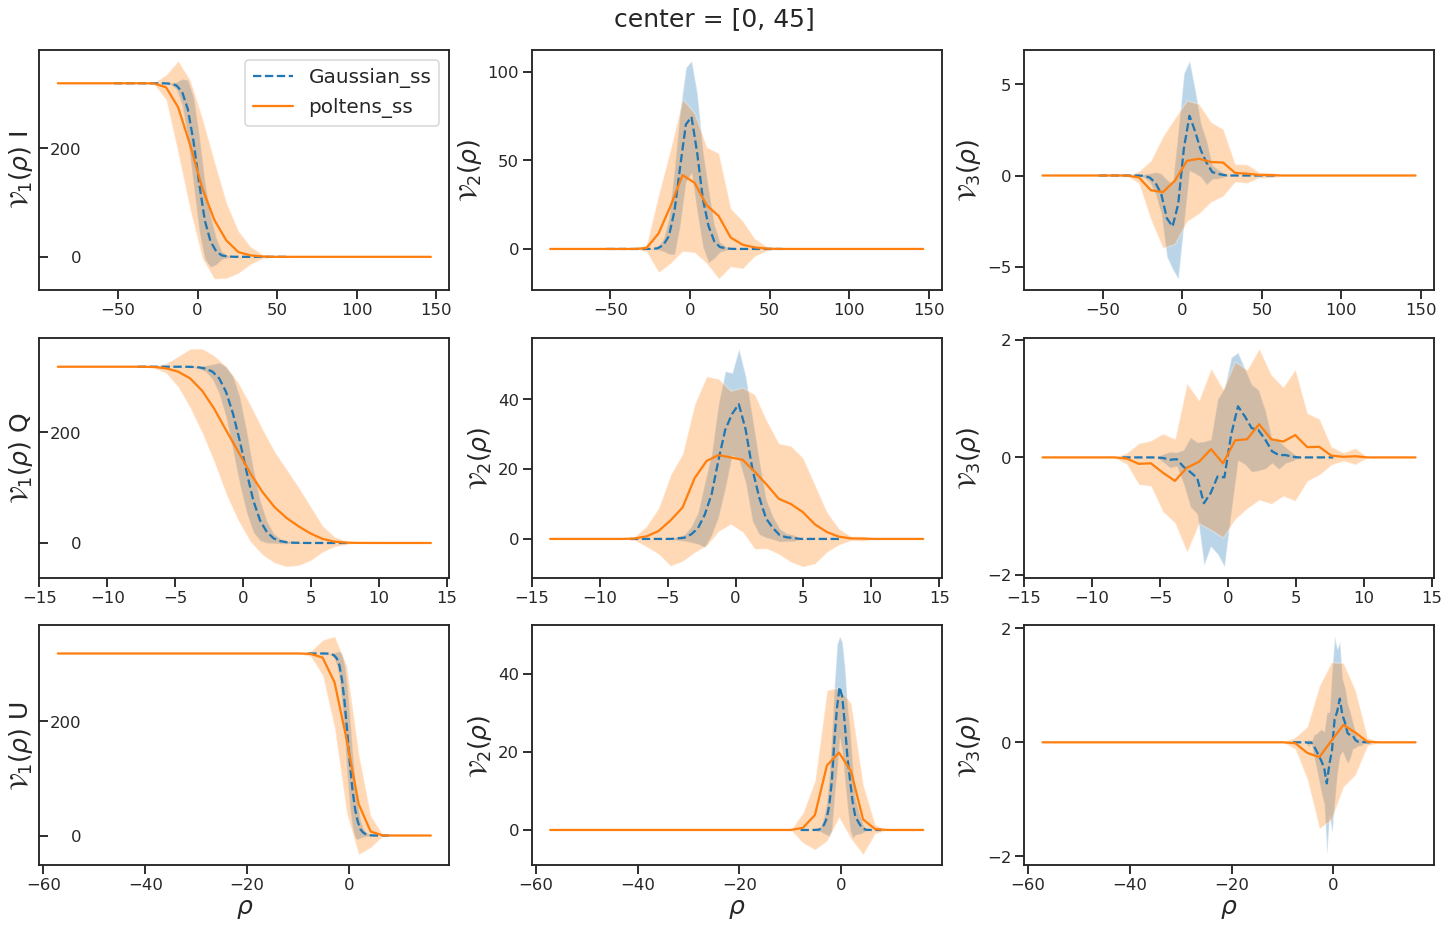

In [471]:
centers = ["0, 45", "45, 45", "0, -45", "315, 45", "311, -56", "45, -45"]
# centers = ["0, 45"]
for i in range(0, len(centers)-5):
    plot_MF(rho_mean[i], F_mean[i], F_std[i], U_mean[i], U_std[i], Chi_mean[i], Chi_std[i], rho_pt_mean[i], F_pt_mean[i], F_pt_std[i], U_pt_mean[i], U_pt_std[i], Chi_pt_mean[i], Chi_pt_std[i], "center = [%s]"%(centers[i]))

# Map Results

In [67]:
nside_pre = 2048
patch_Q = np.random.rand(320, 320)
mask_tot = np.zeros(12*nside_pre**2)
for i in range(len(headers)):
    patch_healpix = f2h(patch_Q, headers[i], nside_pre)
    mask_tot += patch_healpix[1]

In [83]:
savedir = '/global/cscratch1/sd/jianyao/Dust/MFs/'

In [84]:
iqu_ss_only = hp.read_map(savedir + "dust_IQU_from_iqu_only_small_scales_000.fits", field = None)
IQU_iqu = hp.read_map(savedir + "dust_IQU_from_iqu_with_small_scales.fits", field = None) # iqu with small added
IQU_ss_only = hp.read_map(savedir + "dust_IQU_only_small_scales_000.fits", field = None)
IQU = hp.read_map(savedir + f"dust_IQU_with_small_scales.fits", field = None) # IQU with small scales added

In [43]:
ell_fit_high = {"TT":400, "EE":400, "BB":400}; lmax = 2048; spectra_components = ["TT", "EE", "BB"]; output_nside = 2048 
iqu_ss_only = get_small_scales(IQU_iqu, lmax, spectra_components, ell_fit_high, output_nside)
IQU_ss_only = get_small_scales(IQU, lmax, spectra_components, ell_fit_high, output_nside)

In [9]:
dust_IQU = hp.read_map('/global/cscratch1/sd/jianyao/Dust/Dust_IQU_uK_RJ.fits', field = None)

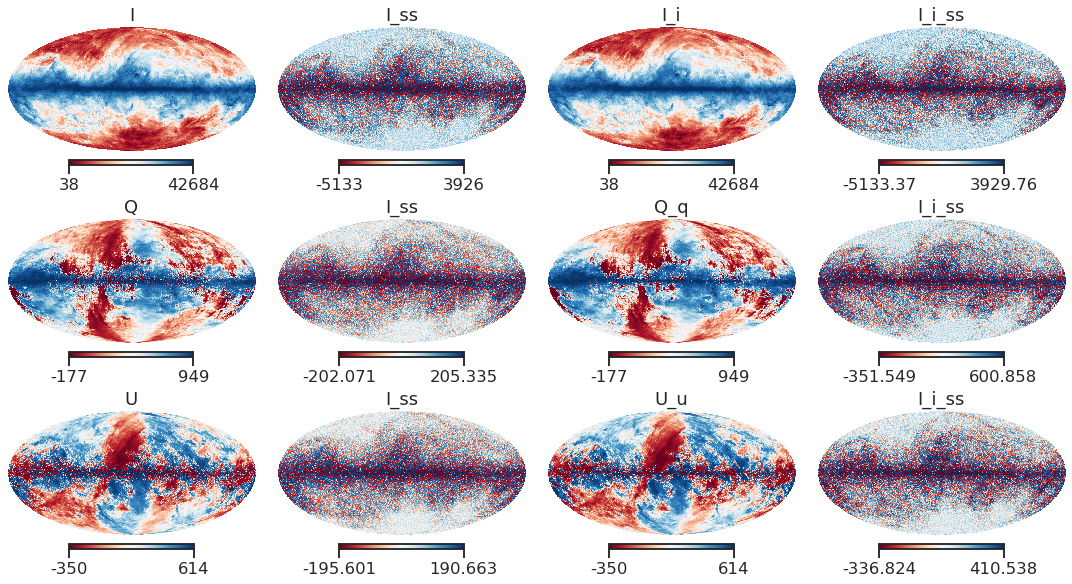

In [19]:
plt.figure(figsize = (15,8))
hp.mollview(IQU[0], norm = 'hist',cmap='RdBu', title = 'I', sub = 341, min = 38, max = 42684)
hp.mollview(IQU_iqu[0], norm = 'hist',cmap='RdBu', title = 'I_i', sub = 343, min = 38, max = 42684)
hp.mollview(IQU_ss_only[0], norm = 'hist',cmap='RdBu', title = 'I_ss', sub = 342, min = -5133, max = 3929)
hp.mollview(iqu_ss_only[0], norm = 'hist',cmap='RdBu', title = 'I_i_ss', sub = 344, min = -5133, max = 3929)


hp.mollview(IQU[1], norm = 'hist',cmap='RdBu', title = 'Q', sub = 345, min = -177, max = 949)
hp.mollview(IQU_iqu[1], norm = 'hist',cmap='RdBu', title = 'Q_q', sub = 347, min = -177, max = 949)
hp.mollview(IQU_ss_only[1], norm = 'hist',cmap='RdBu', title = 'I_ss', sub = 346, min = -351, max = 600)
hp.mollview(iqu_ss_only[1], norm = 'hist',cmap='RdBu', title = 'I_i_ss', sub = 348, min = -351, max = 600)

hp.mollview(IQU[2], norm = 'hist',cmap='RdBu', title = 'U', sub = 349, min = -350, max = 614)
hp.mollview(IQU_iqu[2],norm = 'hist',cmap='RdBu', title = 'U_u', sub = (3, 4, 11), min = -350, max = 614)
hp.mollview(IQU_ss_only[2], norm = 'hist',cmap='RdBu', title = 'I_ss', sub = (3,4,10), min = -336, max = 410)
hp.mollview(iqu_ss_only[2], norm = 'hist',cmap='RdBu', title = 'I_i_ss', sub = (3,4,12), min = -336, max = 410)

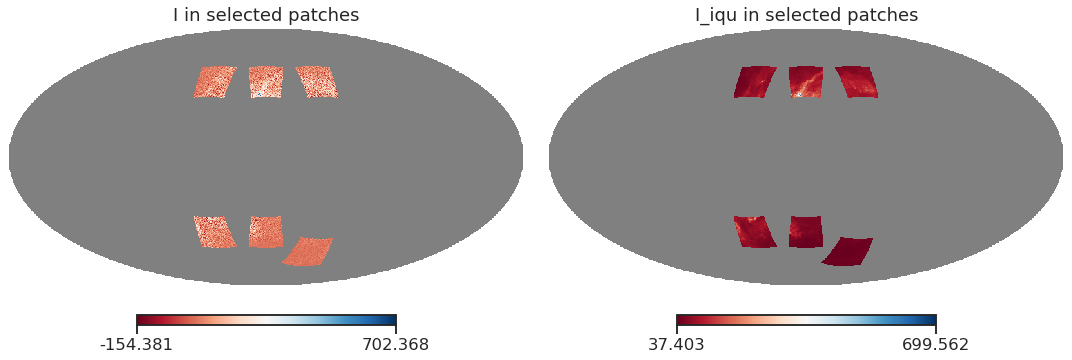

In [101]:
plt.figure(figsize = (15,8))
hp.mollview(Mask(IQU[0], mask_tot), cmap='RdBu', title = "I in selected patches", sub = 121)
hp.mollview(Mask(IQU_iqu[0], mask_tot), cmap='RdBu', title = "I_iqu in selected patches", sub = 122)

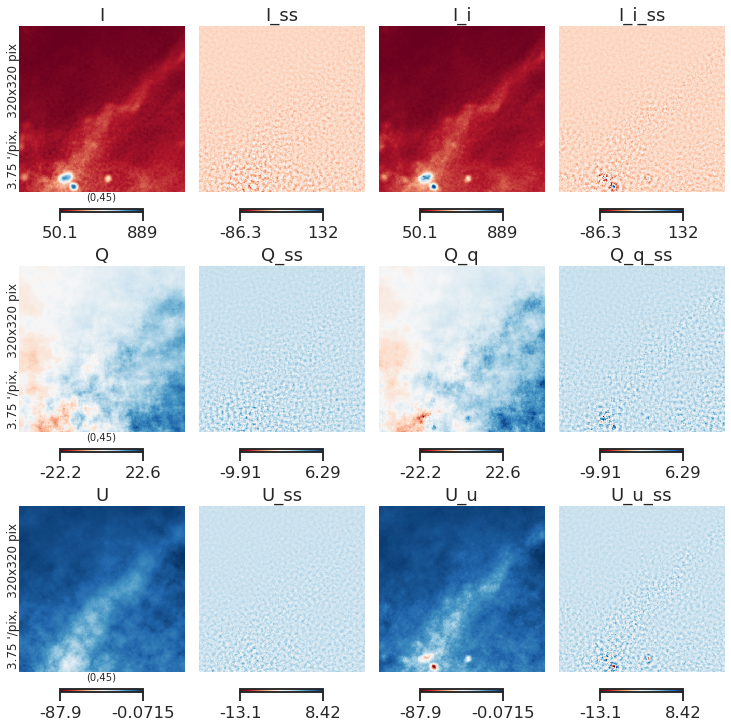

In [44]:
zoom_plot(IQU, IQU_ss_only, IQU_iqu, iqu_ss_only, center = [0,45], unify=True)

## power spectra

In [10]:
planck_mask_filename = "/global/cscratch1/sd/jianyao/Dust/" + "HFI_Mask_GalPlane-apo2_2048_R2.00.fits"
planck_mask_80 = hp.read_map(planck_mask_filename, ["GAL080"])

In [14]:
ell, cl_norm, cl_IQU = run_namaster(IQU, mask=planck_mask_80, lmax=output_lmax, nlbins = 10)
ell, cl_norm, cl_IQU_from_iqu = run_namaster(IQU_iqu, mask=planck_mask_80, lmax=output_lmax, nlbins = 10)

In [15]:
ell, cl_norm, cl_IQU_ori = run_namaster(dust_IQU, mask=planck_mask_80, lmax=output_lmax, nlbins = 10)

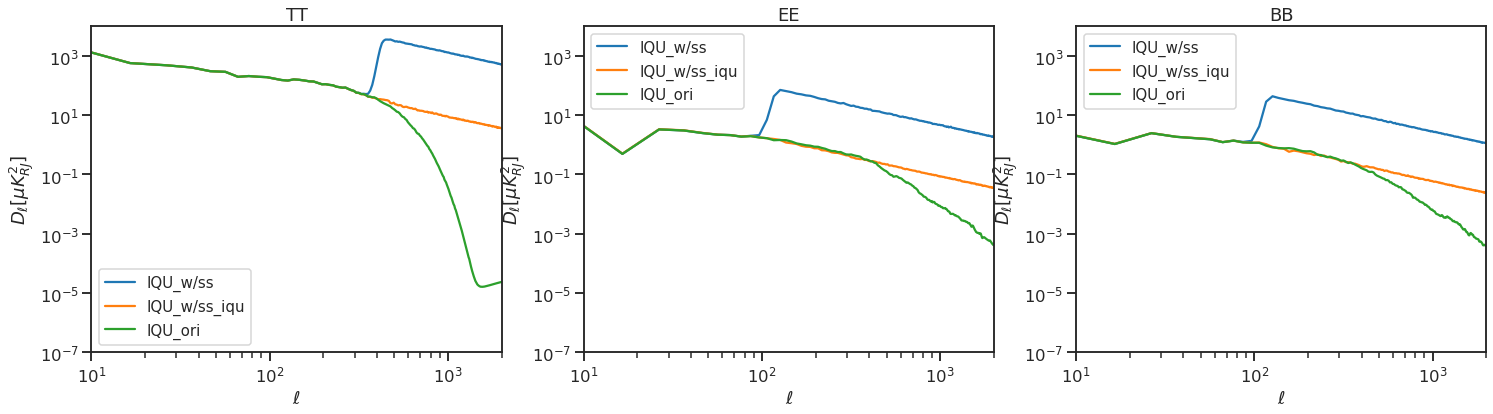

In [57]:
modes = ['TT', 'EE', 'BB']
cl_all = [cl_IQU, cl_IQU_from_iqu, cl_IQU_ori]
names = ['IQU_w/ss', 'IQU_w/ss_iqu', 'IQU_ori']
fig, axes = plt.subplots(1,3, figsize=(25,6))
for i in range(3):
    ax = axes[i]
    for j in range(3):
        ax.loglog(ell,  cl_norm*cl_all[j][modes[i]], label = names[j])
    ax.set_title(modes[i])
    ax.legend(fontsize=15)  
    ax.set_ylabel("$ D_\ell  [\mu K^2_{RJ}]$")
    ax.set_xlabel(("$\ell$"))
    ax.set_xlim(10,2e3) 
    ax.set_ylim(1e-7, 1e4)
# fig.suptitle('PS for large-scale only', fontsize = 15)

In [115]:
3.75*320/60

20.0

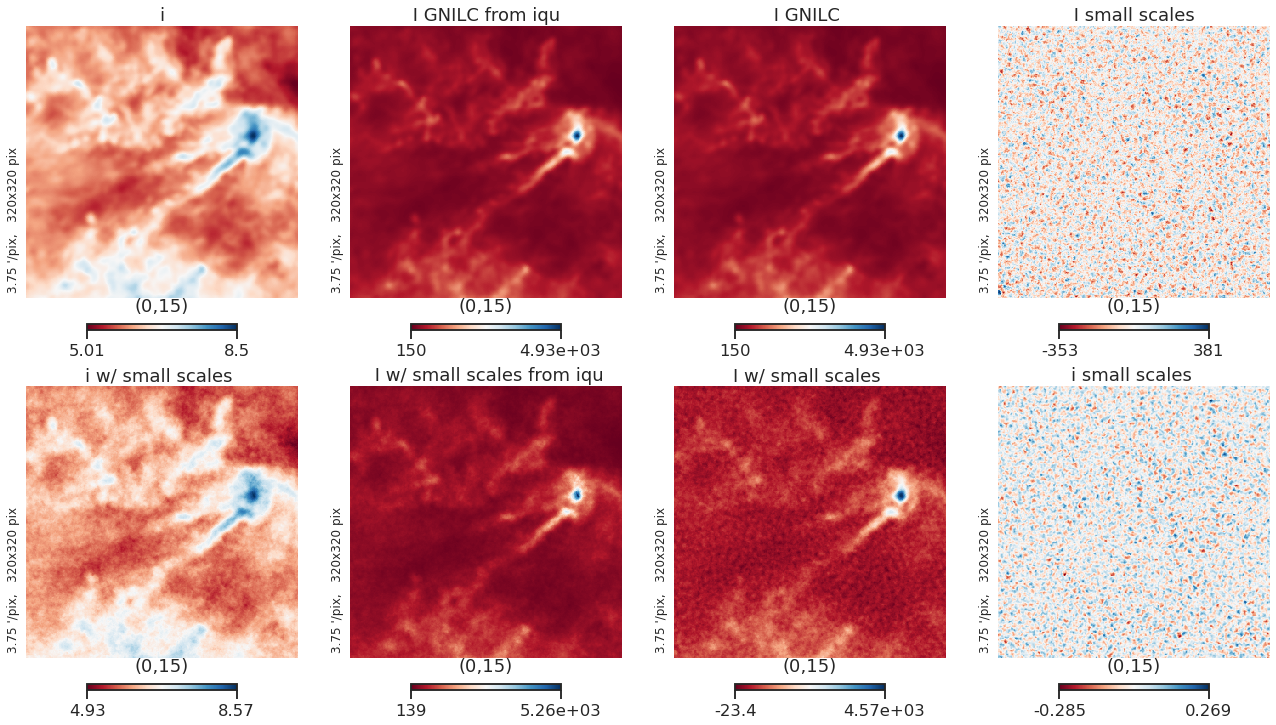

In [192]:
lat=15
plt.figure(figsize=(18,10))
hp.gnomview(iqu_ori[0],cmap='RdBu',  title='i', rot=[0,lat],reso=3.75,xsize=320, sub=241 )
hp.gnomview((IQU_ori_from_iqu[0]),cmap='RdBu',  title=' I GNILC from iqu ', rot=[0,lat],reso=3.75,xsize=320,  sub=242, )
hp.gnomview((IQU_ori[0]),cmap='RdBu',  title=' I GNILC  ', rot=[0,lat],reso=3.75,xsize=320,  sub=243, )
# hp.gnomview((modulate_amp),cmap='RdBu',  title=' modulation I ', rot=[0,lat],reso=3.75,xsize=320,  sub=233, )
hp.gnomview(IQU_ss_only[0], cmap='RdBu',  title=' I small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=244, )
hp.gnomview(iqu[0] ,cmap='RdBu',   title='i w/ small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=245 )
hp.gnomview(IQU_from_iqu[0], cmap='RdBu',  title=' I w/ small scales from iqu', rot=[0,lat],reso=3.75,xsize=320,  sub=246, )
hp.gnomview(IQU[0],cmap='RdBu' ,  title='I w/ small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=247 )
hp.gnomview(iqu_ss_only[0],cmap='RdBu',  title='i small scales ', rot=[0,lat], reso=3.75,xsize=320, sub=248 )

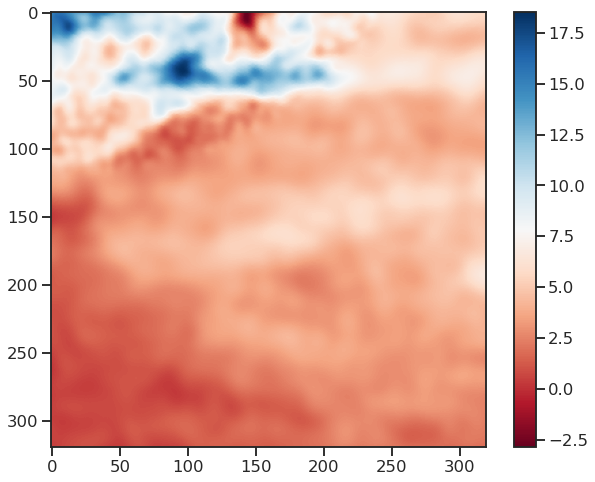

In [111]:
header = set_header(-45, -45, size_patch=3.75/60, Npix=320)
patch_Q = h2f(dust_IQU[1], header)
plt.figure(figsize = (10, 8))
plt.imshow(patch_Q,cmap='RdBu')
plt.colorbar()

# definitions

In [203]:
print("%03d"%11)

011


In [69]:
def Mask(m, mask):
    '''
    mask: the masked pixel is 0.
    '''
    masked = hp.ma(m)
    masked.mask = np.logical_not(mask)
    
    return masked

In [110]:
def zoom_plot(IQU, IQU_ss_only, IQU_iqu, IQU_iqu_ss_only, center, unify = False):
    names_IQU = ["I", "Q", "U"];
    names_iqu = ["I_i", "Q_q", "U_u"];
    
    plt.figure(figsize=(10,10))
    plt.tight_layout(pad=4)
    for i in range(3):
        
        if unify:
            
            IQU_img = hp.gnomview(IQU[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
            IQU_ss_img = hp.gnomview(IQU_ss_only[i], rot=center, reso=3.75,xsize=320, no_plot=True, return_projected_map=True)

            IQU_iqu_img = hp.gnomview(IQU_iqu[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
            IQU_iqu_ss_img = hp.gnomview(IQU_iqu_ss_only[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
        
            IQU_lim = [np.min((IQU_img, IQU_iqu_img)), np.max((IQU_img, IQU_iqu_img))]; 
            ss_lim = [np.min((IQU_ss_img, IQU_iqu_ss_img)), np.max((IQU_ss_img, IQU_iqu_ss_img))]
        else:
            IQU_lim = [None, None]; 
            ss_lim = [None, None]
            
        hp.gnomview(IQU[i],cmap='RdBu',  title='%s'%names_IQU[i], rot=center,reso=3.75,xsize=320, sub=(3, 4, 1 + i*4), min = IQU_lim[0], max = IQU_lim[1])
        hp.gnomview(IQU_ss_only[i],cmap='RdBu',  title='%s_ss'%names_IQU[i], rot=center, reso=3.75,xsize=320, sub=(3, 4, 2 + i*4), notext=True, min = ss_lim[0], max = ss_lim[1])
        
        hp.gnomview(IQU_iqu[i],cmap='RdBu',  title='%s'%names_iqu[i], rot=center,reso=3.75,xsize=320, sub=(3, 4, 3 + i*4), notext=True, min = IQU_lim[0], max = IQU_lim[1])
        hp.gnomview(IQU_iqu_ss_only[i],cmap='RdBu',  title='%s_ss'%names_iqu[i], rot=center,reso=3.75,xsize=320, sub=(3, 4, 4 + i*4), notext=True, min = ss_lim[0], max = ss_lim[1])
    
    plt.savefig('figures/map_patch1.svg', format = 'svg')

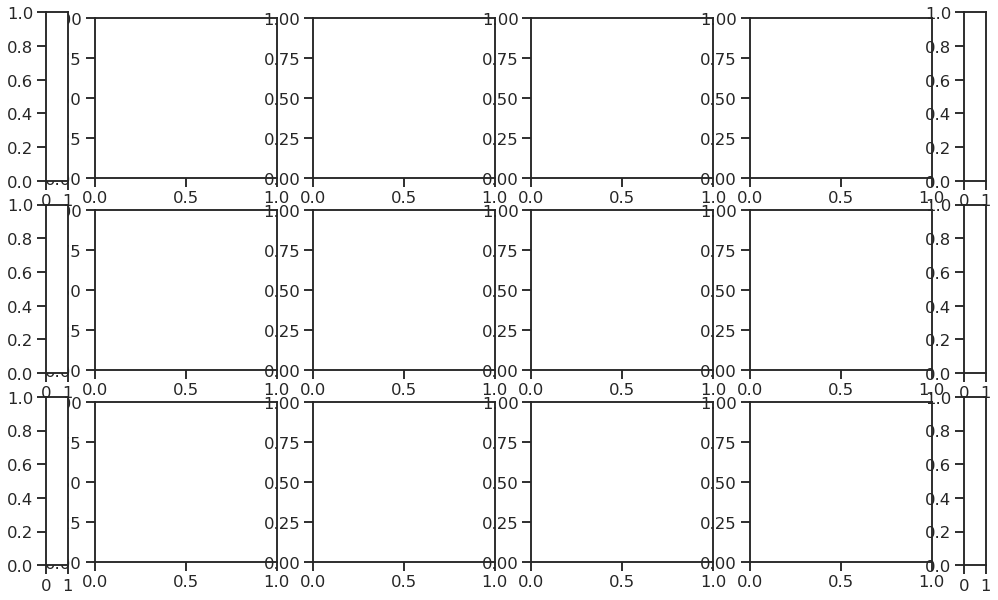

In [362]:
fig, axes = plt.subplots(3, 4, figsize = (15, 10))
a = 0.234; b = 0.033
cax = fig.add_axes([0.08, 0.12, 0.02, a])
cax = fig.add_axes([0.08, 0.12+a+b, 0.02, a])
cax = fig.add_axes([0.08, 0.12+2*(a+b), 0.02, a])
# cax = fig.add_axes([0.01, 0.12, 0.02, 0.75])

cax = fig.add_axes([0.93, 0.12, 0.02, a])
cax = fig.add_axes([0.93, 0.12+a+b, 0.02, a])
cax = fig.add_axes([0.93, 0.12+2*(a+b), 0.02, a])

# plt.gca().add_patch(Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none'))

# plt.tight_layout()

In [174]:
np.arange()

array([0, 2])

In [456]:
def round_10(lists):

    for k in range(len(lists)):
        
        if lists[k] > 100:
            lists[k] = round(lists[k]/10)*10
        else:
            lists[k] = round(lists[k])
            
    return lists

In [457]:
lim = [10.5, 127.3]

In [458]:
round_10(lim)

[10, 130]

In [448]:
for k in range(2):
    print(k)

0
1


In [463]:
def zoom_plot_imshow(IQU, IQU_ss_only, IQU_iqu, iqu_ss_only, center = [45,45], unify=True):
    
    maps = [IQU, IQU_iqu, IQU_ss_only, iqu_ss_only]
    
    # header0 = set_header(45, 45, size_patch=3.75/60, Npix=320)
    header0 = set_header(0, 45, size_patch=3.75/60, Npix=320)
    
    # xlabel = ('55°', '45°', '35°')
    xlabel = ('10°', '0°', '-10°')
    ylabel = ('55°', '45°', '35°')
    Stokes = ['I', 'Q', 'U']; stokes = ['i', 'q', 'u']
    fig, axes = plt.subplots(3, 4, figsize = (17.5, 13.5))
    for i in range(3):
        for j in range(0,3,2):
            if j == 0:
                patch_Q = h2f(maps[j][i], header0)
                patch_q = h2f(maps[j+1][i], header0)
                lim = [np.min((patch_Q, patch_q)), np.max((patch_Q, patch_q))]
                lim = round_10(lim)
                im = axes[i][j].imshow(np.flip(patch_Q, axis = 1), cmap='RdBu', vmin = lim[0], vmax = lim[1])
                axes[i][j+1].imshow(np.flip(patch_q, axis = 1), cmap='RdBu', vmin = lim[0], vmax = lim[1])
                axes[i][j].set_xticks((0, 160, 320)); axes[i][j].set_xticklabels(xlabel)
                axes[i][j+1].set_xticks((0, 160, 320)); axes[i][j+1].set_xticklabels(xlabel)
                axes[i][j].set_title('%s_Gaussian'%Stokes[i])
                axes[i][j+1].set_title('%s_poltens'%(Stokes[i]))
                cax = fig.add_axes([0.07, 0.654 - i*0.267, 0.01, 0.234])
                fig.colorbar(im,cax = cax, ticks = [lim[0], lim[1]], extend = 'both', extendfrac = [0.1,0.05], extendrect = True)
                cax.yaxis.set_ticks_position('left')
            else: # j = 2
                patch_Q = h2f(maps[j][i], header0)
                patch_q = h2f(maps[j+1][i], header0)
                lim = [np.min((patch_Q, patch_q)), np.max((patch_Q, patch_q))]
                im = round_10(lim)
                axes[i][j].imshow(np.flip(patch_Q, axis = 1), cmap='RdBu', vmin = lim[0], vmax = lim[1])
                im = axes[i][j+1].imshow(np.flip(patch_q, axis = 1), cmap='RdBu', vmin = lim[0], vmax = lim[1])
                axes[i][j].set_xticks((0, 160, 320)); axes[i][j].set_xticklabels(xlabel)
                axes[i][j+1].set_xticks((0, 160, 320)); axes[i][j+1].set_xticklabels(xlabel)
                axes[i][j].set_title('%s_Gaussian_ss'%Stokes[i])
                axes[i][j+1].set_title('%s_poltens_ss'%(Stokes[i]))
                cax = fig.add_axes([0.92, 0.654 - i*0.267, 0.01, 0.234])
                fig.colorbar(im,cax = cax, ticks = [lim[0], lim[1]], extend = 'both', extendfrac = [0.1,0.05], extendrect = True)
                
            axes[i][j].set_yticks((0, 160, 320)); axes[i][j].set_yticklabels(ylabel)
            axes[i][j+1].set_yticks((0, 160, 320)); axes[i][j+1].set_yticklabels(ylabel)
    fig.suptitle('center = [0,45], in $\mu K_{RJ}$ ', fontsize = 20, y = 0.93)
    plt.savefig('figures/maps_patch1.pdf', format = 'pdf')

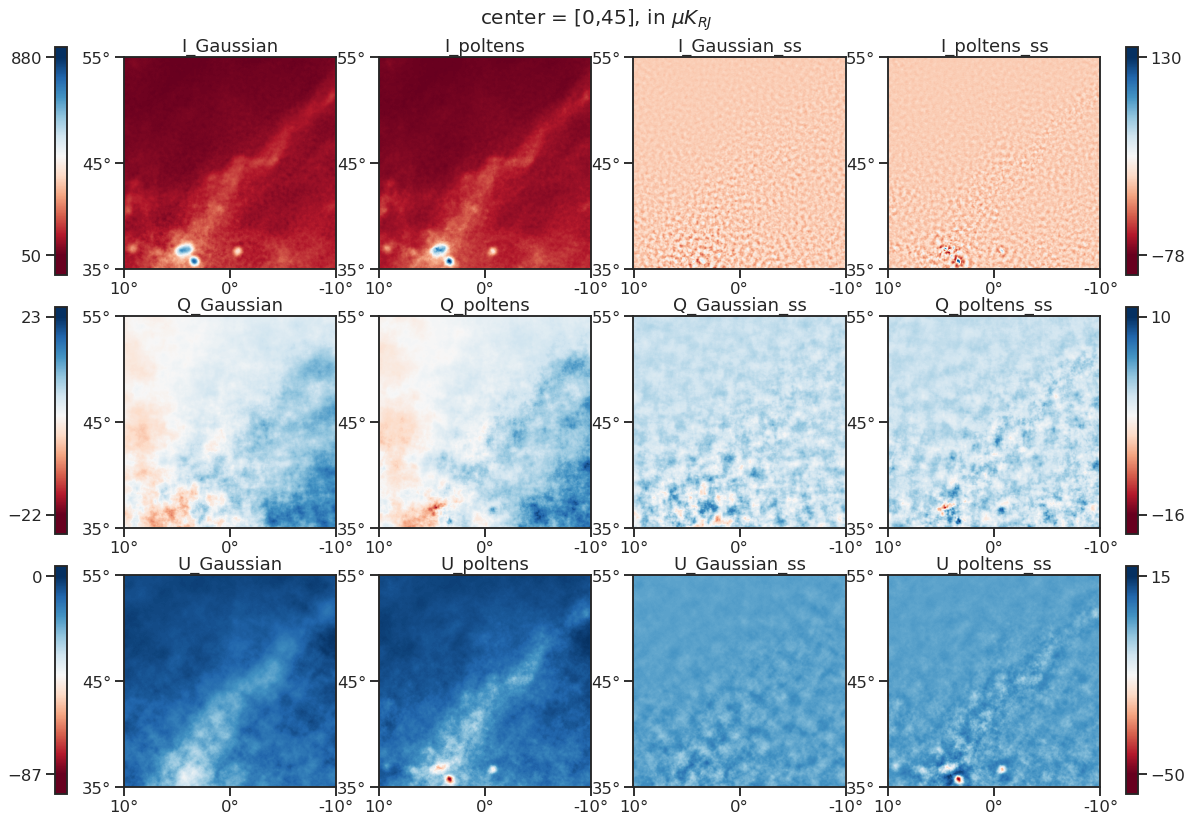

In [464]:
zoom_plot_imshow(IQU, IQU_ss_only, IQU_iqu, iqu_ss_only)

In [482]:
def zoom_plot_imshow_ss_only(IQU_ss_only, iqu_ss_only, center = [45,45], unify=True):
    
    maps = [IQU_ss_only, iqu_ss_only]
    
    # header0 = set_header(45, 45, size_patch=3.75/60, Npix=320)
    header0 = set_header(0, 45, size_patch=3.75/60, Npix=320)
    
    # xlabel = ('55°', '45°', '35°')
    xlabel = ('10°', '0°', '-10°')
    ylabel = ('55°', '45°', '35°')
    Stokes = ['I', 'Q', 'U']; stokes = ['i', 'q', 'u']
    fig, axes = plt.subplots(3, 2, figsize = (8.5, 13.5))
    for i in range(3):
 
        patch_Q = h2f(maps[0][i], header0)
        patch_q = h2f(maps[1][i], header0)
        lim = [np.min((patch_Q, patch_q)), np.max((patch_Q, patch_q))]
        lim = round_10(lim)
        im = axes[i][0].imshow(np.flip(patch_Q, axis = 1), cmap='RdBu', vmin = lim[0], vmax = lim[1])
        axes[i][1].imshow(np.flip(patch_q, axis = 1), cmap='RdBu', vmin = lim[0], vmax = lim[1])
        axes[i][0].set_xticks((0, 160, 320)); axes[i][0].set_xticklabels(xlabel)
        axes[i][1].set_xticks((0, 160, 320)); axes[i][1].set_xticklabels(xlabel)
        axes[i][0].set_title('%s_Gaussian'%Stokes[i])
        axes[i][1].set_title('%s_poltens'%(Stokes[i]))
        cax = fig.add_axes([0.02, 0.654 - i*0.267, 0.02, 0.234])
        fig.colorbar(im,cax = cax, ticks = [lim[0], lim[1]], extend = 'both', extendfrac = [0.1,0.05], extendrect = True)
        cax.yaxis.set_ticks_position('left')

                
        axes[i][0].set_yticks((0, 160, 320)); axes[i][0].set_yticklabels(ylabel)
        axes[i][1].set_yticks((0, 160, 320)); axes[i][1].set_yticklabels(ylabel)
    fig.suptitle('center = [0,45], in $\mu K_{RJ}$ ', fontsize = 20, y = 0.93)
    # plt.savefig('figures/maps_patch1.pdf', format = 'pdf')

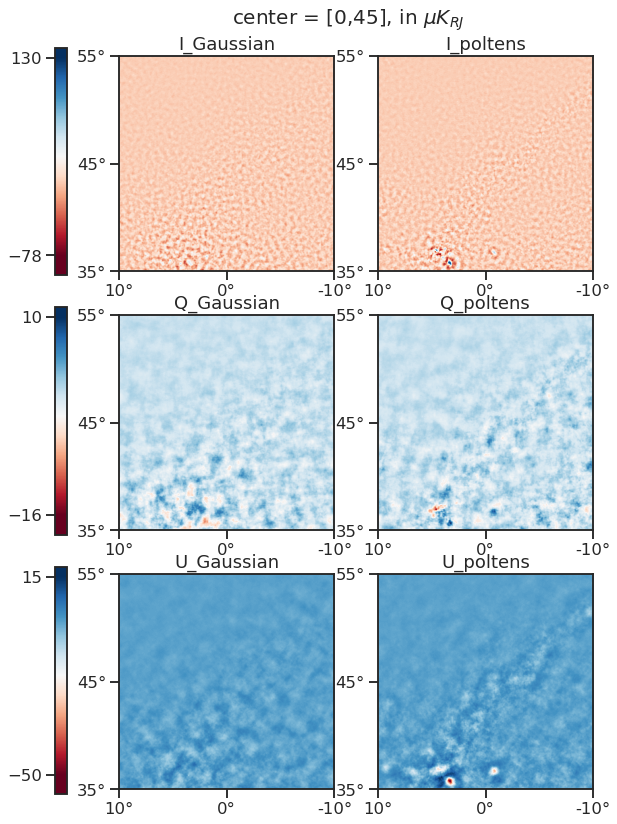

In [483]:
zoom_plot_imshow_ss_only(IQU_ss_only, iqu_ss_only)

In [95]:
def zoom_plot_three(IQU, IQU_ss_only, IQU_iqu, IQU_iqu_ss_only, IQU_forse, IQU_forse_ss_only, center, unify = False):
    names_IQU = ["I", "Q", "U"];
    names_iqu = ["I_i", "Q_q", "U_u"];
    names_F = ["I_F", "Q_F", "U_F"];
    
    plt.figure(figsize=(15,10))
    for i in range(3):
        
        if unify:
            
            IQU_img = hp.gnomview(IQU[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
            IQU_ss_img = hp.gnomview(IQU_ss_only[i], rot=center, reso=3.75,xsize=320, no_plot=True, return_projected_map=True)

            IQU_iqu_img = hp.gnomview(IQU_iqu[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
            IQU_iqu_ss_img = hp.gnomview(IQU_iqu_ss_only[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
            
            IQU_forse_img = hp.gnomview(IQU_forse[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
            IQU_forse_ss_img = hp.gnomview(IQU_forse_ss_only[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
        
            IQU_lim = [np.min((IQU_img, IQU_iqu_img, IQU_forse_img)), np.max((IQU_img, IQU_iqu_img, IQU_forse_img))]; 
            ss_lim = [np.min((IQU_ss_img, IQU_iqu_ss_img, IQU_forse_ss_img)), np.max((IQU_ss_img, IQU_iqu_ss_img, IQU_forse_ss_img))]
        else:
            IQU_lim = [None, None]; 
            ss_lim = [None, None];
            
        hp.gnomview(IQU[i],cmap='RdBu',  title='%s'%names_IQU[i], rot=center,reso=3.75,xsize=320, sub=(3, 6, 1 + i*6), min = IQU_lim[0], max = IQU_lim[1])
        hp.gnomview(IQU_ss_only[i],cmap='RdBu',  title='%s_ss'%names_IQU[i], rot=center, reso=3.75,xsize=320, sub=(3, 6, 2 + i*6), notext=True, min = ss_lim[0], max = ss_lim[1])
        
        hp.gnomview(IQU_iqu[i],cmap='RdBu',  title='%s'%names_iqu[i], rot=center,reso=3.75,xsize=320, sub=(3, 6, 3 + i*6), notext=True, min = IQU_lim[0], max = IQU_lim[1])
        hp.gnomview(IQU_iqu_ss_only[i],cmap='RdBu',  title='%s_ss'%names_iqu[i], rot=center,reso=3.75,xsize=320, sub=(3, 6, 4 + i*6), notext=True, min = ss_lim[0], max = ss_lim[1])
    
    
        hp.gnomview(IQU_forse[i],cmap='RdBu',  title='%s'%names_F[i], rot=center,reso=3.75,xsize=320, sub=(3, 6, 5 + i*6), notext=True,  min = IQU_lim[0], max = IQU_lim[1])
        hp.gnomview(IQU_forse_ss_only[i],cmap='RdBu',  title='%s_ss'%names_F[i], rot=center, reso=3.75,xsize=320, sub=(3, 6, 6 + i*6), notext=True, min = ss_lim[0], max = ss_lim[1])
